In [1]:
push!(LOAD_PATH,"../src/")
using ProgressBars
using ITensors
using PastaQ
using RandomMeas

In [2]:
#Perform RM in the first experiment
N = 6
circuit = randomcircuit(N, depth=2)
noisemodel1 = (1 => ("depolarizing", (p = 0,)),2 => ("depolarizing", (p = 0.05,)))
ρ1 = runcircuit(circuit;noise = noisemodel1);
ξ = [firstind(ρ1[i],tags="Site",plev=0) for i in 1:N]
println("state prepared in the `experiment' 1 ")

state prepared in the `experiment' 1 


In [3]:
#Perform Randomized measurements
nu=200 #Number of random unitaries
NM=1000 #Number of projective measurements per unitary
u = Vector{Vector{ITensor}}()
data1 = zeros(Int8,(nu,NM,N)) #Data storage
datat = zeros(Int8,(NM,N))
for r in ProgressBar(1:nu, printing_delay=2)
            push!(u,get_rotations(ξ,1)) #generate random unitary
            get_RandomMeas!(datat,ρ1,u[r],NM) #data acquisation in simulated quantum device
            data1[r,:,:] = datat
end

0.0%┣                                            ┫ 0/200 [00:04<-14:-17, -4s/it]
0.5%┣▏                                         ┫ 1/200 [00:17<Inf:Inf, InfGs/it]
100.0%┣██████████████████████████████████████████┫ 200/200 [00:18<00:00, 11it/s]
100.0%┣██████████████████████████████████████████┫ 200/200 [00:18<00:00, 11it/s]


In [4]:
#Look at the data
println(data1[2,:,:])

Int8[1 2 2 1 1 2; 1 1 1 2 1 1; 2 2 2 2 2 1; 1 1 1 2 2 1; 1 1 1 2 2 1; 1 1 1 2 1 1; 1 1 2 2 1 2; 1 1 2 2 2 1; 1 1 1 2 2 1; 1 2 1 1 1 2; 1 2 1 2 2 1; 1 1 2 2 1 2; 1 2 1 2 2 1; 1 1 1 1 1 2; 1 1 1 1 1 1; 1 1 2 2 2 1; 1 2 2 2 1 1; 1 1 2 1 1 2; 2 2 2 2 2 1; 2 1 2 1 2 1; 1 2 2 2 2 1; 1 2 1 2 1 2; 1 1 2 1 2 1; 1 1 1 2 2 1; 1 2 1 2 1 1; 1 1 1 2 2 1; 1 2 2 1 1 2; 2 2 1 1 1 2; 1 1 2 2 2 1; 1 2 2 1 1 1; 1 1 1 2 2 1; 1 1 1 2 2 1; 2 1 2 2 2 1; 1 2 2 2 1 1; 1 1 2 2 2 1; 1 2 1 1 1 2; 1 1 1 2 1 1; 1 1 1 1 1 1; 1 2 2 2 2 1; 1 2 2 2 1 2; 1 1 2 2 2 1; 1 1 1 2 1 2; 2 1 1 2 2 1; 2 2 1 2 2 1; 2 2 2 2 1 1; 1 2 2 1 2 1; 1 1 2 2 1 2; 1 2 2 2 2 1; 1 2 1 1 1 2; 1 2 2 2 2 1; 1 1 1 2 1 2; 1 1 2 2 2 1; 1 2 2 2 1 1; 1 2 2 1 1 2; 1 2 2 2 1 2; 1 1 1 2 2 1; 2 2 1 2 1 1; 1 2 1 2 2 2; 1 1 2 1 1 1; 1 1 2 2 2 1; 1 2 2 1 1 1; 1 2 1 2 1 2; 1 1 1 2 1 2; 1 2 2 1 1 2; 1 2 1 2 2 1; 1 2 2 1 1 2; 1 1 2 1 2 1; 1 2 2 2 2 1; 1 1 1 2 1 1; 1 1 2 1 1 2; 1 1 1 2 2 1; 1 1 2 1 1 2; 2 2 2 2 2 1; 1 2 2 2 2 1; 1 2 1 2 1 1; 1 1 2 2 2 1; 1 1 1 1

In [5]:
#Perform RM in the second experiment
noisemodel2 = (1 => ("amplitude_damping", (γ = 0.1,)),2 => ("amplitude_damping", (γ = 0.1,)))
ρ2 = runcircuit(circuit;noise = noisemodel2);
ξ2 = [firstind(ρ2[i],tags="Site",plev=0) for i in 1:N]
for i in 1:N
    replaceind!(ρ2[i],ξ2[i],ξ[i])
    replaceind!(ρ2[i],ξ2[i]',ξ[i]')
end
println("state prepared in the `experiment' 2 ")
data2 = zeros(Int8,(nu,NM,N))
for r in ProgressBar(1:nu, printing_delay=2)
                get_RandomMeas!(datat,ρ2,u[r],NM)
                data2[r,:,:] = datat
end

┌ Warning: Noise model not defined for 2-qubit gates! Applying tensor-product noise instead.
└ @ PastaQ ~/.julia/packages/PastaQ/IVHHb/src/circuits/noise.jl:177
┌ Warning: Noise model not defined for 2-qubit gates! Applying tensor-product noise instead.
└ @ PastaQ ~/.julia/packages/PastaQ/IVHHb/src/circuits/noise.jl:177
┌ Warning: Noise model not defined for 2-qubit gates! Applying tensor-product noise instead.
└ @ PastaQ ~/.julia/packages/PastaQ/IVHHb/src/circuits/noise.jl:177
┌ Warning: Noise model not defined for 2-qubit gates! Applying tensor-product noise instead.
└ @ PastaQ ~/.julia/packages/PastaQ/IVHHb/src/circuits/noise.jl:177
┌ Warning: Noise model not defined for 2-qubit gates! Applying tensor-product noise instead.
└ @ PastaQ ~/.julia/packages/PastaQ/IVHHb/src/circuits/noise.jl:177


state prepared in the `experiment' 2 


0.0%┣                                              ┫ 0/200 [00:00<00:00, -0s/it]
100.0%┣█████████████████████████████████████████┫ 200/200 [00:00<00:00, 495it/s]
100.0%┣█████████████████████████████████████████┫ 200/200 [00:00<00:00, 495it/s]


In [6]:
#Build histograms for each unitary
P1 = Vector{ITensor}()
P2 = Vector{ITensor}()
for r in 1:nu
                push!(P1,get_Born_data_binary(data1[r,:,:],ξ))
                push!(P2,get_Born_data_binary(data2[r,:,:],ξ))
end

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
┌ Warning: backend `GR` is not installed.
└ @ Plots ~/.julia/packages/Plots/a3u1v/src/backends.jl:43
[ Info: Precompiling FileIOExt [f5f51d8f-5827-5d2e-939b-192fcd6ec70c]
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]
[ Info: Saved animation to /scratch/Codes/RandomMeas_dev.jl/examples/tmp.gif


Plots.AnimatedGif("/scratch/Codes/RandomMeas_dev.jl/examples/tmp.gif")
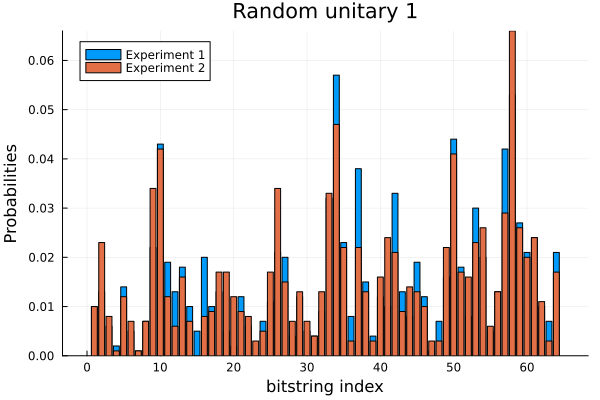

In [7]:
using Plots
anim = @animate for r in 1:nu
    y1 =  reshape(array(P1[r]),(2^N))
    y2 =  reshape(array(P2[r]),(2^N))
    bar(y1,label="Experiment 1")
    bar!(y2,label="Experiment 2")
    xlabel!("bitstring index")
    ylabel!("Probabilities")
    title!("Random unitary $(r)")
end
gif(anim,fps=0.5)

In [8]:
overlaps = 0
for r in 1:nu
    overlaps += get_overlap(P1[r],P2[r],ξ,N)/nu
end
purity1s = get_purity_hamming(data1,ξ)
purity2s = get_purity_hamming(data2,ξ)
Fs = overlaps/max(purity1s,purity2s)
println("Estimated overlap ",overlaps)
println("Estimated purity1 ",purity1s)
println("Estimated purity2 ",purity2s)
println("Estimated fidelity ",Fs)

Estimated overlap 0.5815104099999999
Estimated purity1 0.675142312312312
Estimated purity2 0.5282042642642641
Estimated fidelity 0.8613153099653467


In [9]:
overlap = real(trace(multiply(ρ1,ρ2),ξ))
purity1 = get_purity(ρ1)
purity2 = get_purity(ρ2)
F = overlap/max(purity1,purity2)
println("overlap ",overlap)
println("purity1 ",purity1)
println("purity2 ",purity2)
println("fidelity ",F)

overlap 0.5803669495038895
purity1 0.6591228440813586
purity2 0.5348751289863483
fidelity 0.8805140873440158
